# Data Dive 5

# Due by: April 27, 2021

## Are the posted wait times for rides inside of Magic Kindom an accurate representation of actual wait times? 


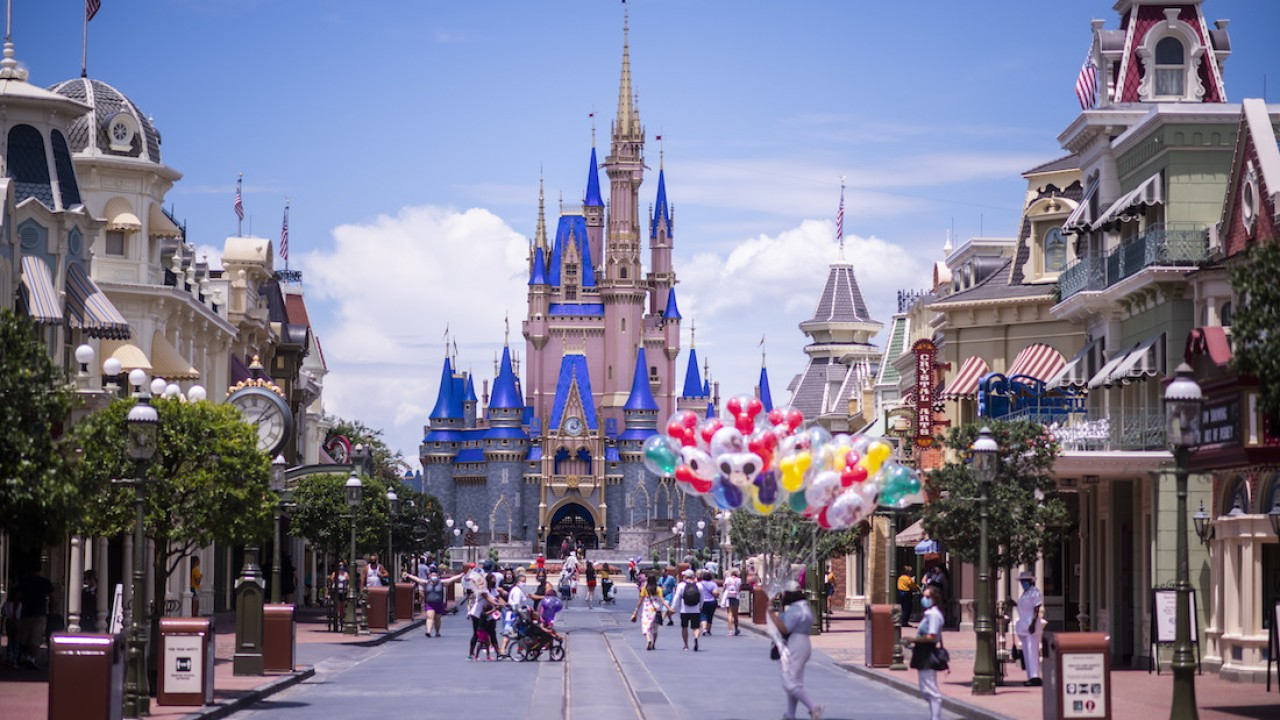

### Source files were provided in D2L. 
#### Primary Files used were: splash_mountain.csv, pirates_of_caribbean.csv, and 7_dwarfs_train.csv

# Data Dictionary

### Date - The date the observation was recorded

### SACTMIN - The observed Actualy wait time at that ride

### SPOSTMIN - the posted wait time at that ride

### Dwarf = 7 Dwarfs Mine Train

### Splash = Splash Mountain

### Pirate = Pirates of the Carribean

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from collections import Counter
import plotly.express as px

pd.set_option('display.max_columns',200) #allows for up to 500 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('seaborn') # a style that can be used for plots - see style reference above

import warnings

import missingno as msn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import scipy.sparse as sp

In [2]:
dwarf = pd.read_csv('7_dwarfs_train.csv')
dwarf

date             datetime  SACTMIN  SPOSTMIN
0       01/01/2015  2015-01-01 07:51:12      NaN      45.0
1       01/01/2015  2015-01-01 08:02:13      NaN      60.0
2       01/01/2015  2015-01-01 08:05:30     54.0       NaN
3       01/01/2015  2015-01-01 08:09:12      NaN      60.0
4       01/01/2015  2015-01-01 08:16:12      NaN      60.0
...            ...                  ...      ...       ...
264922  10/06/2020  2020-10-06 17:26:19      NaN      35.0
264923  10/06/2020  2020-10-06 17:40:02      NaN      35.0
264924  10/06/2020  2020-10-06 17:47:01      NaN      35.0
264925  10/06/2020  2020-10-06 17:54:01      NaN      35.0
264926  10/06/2020  2020-10-06 18:00:01      NaN      35.0

[264927 rows x 4 columns]

In [3]:
splash = pd.read_csv('splash_mountain.csv')
splash

date             datetime  SACTMIN  SPOSTMIN
0       01/01/2015  2015-01-01 07:51:12      NaN       5.0
1       01/01/2015  2015-01-01 08:02:13      NaN       5.0
2       01/01/2015  2015-01-01 08:09:12      NaN       5.0
3       01/01/2015  2015-01-01 08:16:12      NaN       5.0
4       01/01/2015  2015-01-01 08:23:12      NaN       5.0
...            ...                  ...      ...       ...
231909  10/06/2020  2020-10-06 17:40:02      NaN      45.0
231910  10/06/2020  2020-10-06 17:47:01      NaN      45.0
231911  10/06/2020  2020-10-06 17:54:01      NaN      45.0
231912  10/06/2020  2020-10-06 18:00:01      NaN      45.0
231913  10/06/2020  2020-10-06 18:20:17     39.0       NaN

[231914 rows x 4 columns]

In [4]:
pirate = pd.read_csv('pirates_of_caribbean.csv')
pirate

date             datetime  SACTMIN  SPOSTMIN
0       01/01/2015  2015-01-01 08:27:58      NaN    -999.0
1       01/01/2015  2015-01-01 08:56:55      NaN    -999.0
2       01/01/2015  2015-01-01 08:57:38      NaN    -999.0
3       01/01/2015  2015-01-01 08:58:34      NaN    -999.0
4       01/01/2015  2015-01-01 09:24:55      NaN    -999.0
...            ...                  ...      ...       ...
244110  10/06/2020  2020-10-06 17:33:01      NaN      25.0
244111  10/06/2020  2020-10-06 17:40:02      NaN      25.0
244112  10/06/2020  2020-10-06 17:47:01      NaN      25.0
244113  10/06/2020  2020-10-06 17:54:01      NaN      25.0
244114  10/06/2020  2020-10-06 18:00:01      NaN      25.0

[244115 rows x 4 columns]

In [5]:
splash_date = splash['date']

In [6]:
splash_act = splash['SACTMIN']

In [7]:
splash_post = splash['SPOSTMIN']

In [8]:
# Due to having days where a ride needed maitenence or was out of order our data sets contain values such as "-999"
#this code is used to removed extremes from both ends to help normalize our visualizations later. 
splash_act = splash_act[splash_act.between(splash_act.quantile(.05), splash_act.quantile(.95))]
splash_act.head()

9       4.0
41     19.0
328    54.0
379    49.0
392     9.0
Name: SACTMIN, dtype: float64

In [9]:
# Due to having days where a ride needed maitenence or was out of order our data sets contain values such as "-999"
#this code is used to removed extremes from both ends to help normalize our visualizations later. 

splash_post = splash_post[splash_post.between(splash_post.quantile(.15), splash_post.quantile(.85))]
splash_post.head()

0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
Name: SPOSTMIN, dtype: float64

In [10]:
#Now we are concatenating together the new date and normalized posted wait times. 

splash_post = pd.concat([splash_date, splash_post], axis=1, join='inner')
splash_post.head(7)

date  SPOSTMIN
0  01/01/2015       5.0
1  01/01/2015       5.0
2  01/01/2015       5.0
3  01/01/2015       5.0
4  01/01/2015       5.0
5  01/01/2015       5.0
6  01/01/2015       5.0

In [11]:
#Now we are concatenating together the new date and normalized actual wait times. 
splash_act = pd.concat([splash_date, splash_act], axis=1, join='inner')
splash_act.head(7)

date  SACTMIN
9    01/01/2015      4.0
41   01/01/2015     19.0
328  01/03/2015     54.0
379  01/03/2015     49.0
392  01/03/2015      9.0
437  01/04/2015      7.0
448  01/04/2015     25.0

In [12]:
#This is being used to create a mean value for all dates and joing those dates together so we don't have 1/1/2015 7 times
splash_act = splash_act.groupby('date').mean()
splash_act

SACTMIN
date                 
01/01/2015  11.500000
01/01/2016  49.000000
01/01/2017  27.400000
01/01/2020   4.000000
01/02/2016  13.500000
...               ...
12/30/2018  14.000000
12/31/2015  27.666667
12/31/2016  32.000000
12/31/2017  14.000000
12/31/2019  54.000000

[1416 rows x 1 columns]

In [13]:
#This is doing the same as above only on the posted wait times instead of the actual wait times. 
splash_post = splash_post.groupby('date').mean()
splash_post

SPOSTMIN
date                 
01/01/2015  28.156028
01/01/2016  33.615385
01/01/2017  33.762376
01/01/2018   9.712230
01/01/2019  51.793478
...               ...
12/31/2015  35.584416
12/31/2016  26.637931
12/31/2017  32.012987
12/31/2018  34.130435
12/31/2019  30.187500

[1781 rows x 1 columns]

In [14]:
# This is resetting our index so that date is added back into our data set as a column
splash_post.reset_index(inplace = True)

In [15]:
# Again the same as above only this time on the actual wait time data set. 
splash_act.reset_index(inplace = True)

In [16]:
# This is an important piece of code that is sorting our dates in descending order by Year:Month:Day
splash_act["date"] = pd.to_datetime(splash_act["date"])

splash_act = splash_act.sort_values(by="date")
splash_act

date    SACTMIN
0    2015-01-01  11.500000
8    2015-01-03  37.333333
11   2015-01-04  19.750000
82   2015-02-01  11.400000
89   2015-02-03   2.500000
...         ...        ...
1094 2020-10-02  23.666667
1098 2020-10-03  20.000000
1103 2020-10-04  38.000000
1106 2020-10-05  23.400000
1110 2020-10-06  22.250000

[1416 rows x 2 columns]

In [17]:
#Same as above
splash_post["date"] = pd.to_datetime(splash_post["date"])

splash_post = splash_post.sort_values(by="date")
splash_post

date   SPOSTMIN
0    2015-01-01  28.156028
6    2015-01-02  28.925234
12   2015-01-03  38.305785
18   2015-01-04  30.992063
101  2015-01-31   6.724138
...         ...        ...
1373 2020-10-02  47.921348
1378 2020-10-03  47.906977
1383 2020-10-04  43.518519
1388 2020-10-05  51.111111
1393 2020-10-06  49.931507

[1781 rows x 2 columns]

In [76]:
#This visualization is showing the Actual wait times for Splash Mountain starting in 2015 and ending in 2020
fig = px.line(splash_act, x="date", y="SACTMIN")
fig.show()

In [68]:
#This visualization is showing the Posted wait times for Splash Mountain starting in 2015 and ending in 2020
fig = px.line(splash_post, x="date", y="SPOSTMIN")
fig.show()

In [20]:
pirate_date = pirate['date']

In [21]:
pirate_act = pirate['SACTMIN']

In [22]:
pirate_post = pirate['SPOSTMIN']

In [23]:
pirate_act = pirate_act[pirate_act.between(pirate_act.quantile(.05), pirate_act.quantile(.95))]
pirate_act.head()

6       3.0
11     40.0
127    20.0
139    37.0
147    23.0
Name: SACTMIN, dtype: float64

In [24]:
pirate_post = pirate_post[pirate_post.between(pirate_post.quantile(.15), pirate_post.quantile(.85))]
pirate_post.head()

5     10.0
7     15.0
8     25.0
9     25.0
10    35.0
Name: SPOSTMIN, dtype: float64

In [25]:
pirate_post = pd.concat([pirate_date, pirate_post], axis=1, join='inner')
pirate_post.head(7)

date  SPOSTMIN
5   01/01/2015      10.0
7   01/01/2015      15.0
8   01/01/2015      25.0
9   01/01/2015      25.0
10  01/01/2015      35.0
13  01/01/2015      45.0
24  01/01/2015      30.0

In [26]:
pirate_act = pd.concat([pirate_date, pirate_act], axis=1, join='inner')
pirate_act.head(7)

date  SACTMIN
6    01/01/2015      3.0
11   01/01/2015     40.0
127  01/02/2015     20.0
139  01/02/2015     37.0
147  01/02/2015     23.0
160  01/02/2015     30.0
162  01/02/2015     29.0

In [27]:
pirate_act = pirate_act.groupby('date').mean()

In [28]:
pirate_post = pirate_post.groupby('date').mean()

In [29]:
pirate_post.reset_index(inplace = True)

In [30]:
pirate_act.reset_index(inplace = True)

In [31]:
pirate_act["date"] = pd.to_datetime(pirate_act["date"])

pirate_act = pirate_act.sort_values(by="date")
pirate_act

date    SACTMIN
0    2015-01-01  21.500000
6    2015-01-02  25.142857
12   2015-01-03  10.666667
18   2015-01-04   9.500000
24   2015-01-05  14.000000
...         ...        ...
1298 2020-10-02  23.916667
1304 2020-10-03  29.500000
1310 2020-10-04  18.857143
1316 2020-10-05  25.428571
1322 2020-10-06  41.000000

[1724 rows x 2 columns]

In [32]:
pirate_post["date"] = pd.to_datetime(pirate_post["date"])

pirate_post = pirate_post.sort_values(by="date")
pirate_post

date   SPOSTMIN
0    2015-01-01  25.200000
6    2015-01-02  25.000000
12   2015-01-03  27.581967
18   2015-01-04  19.677419
24   2015-01-05  23.764045
...         ...        ...
1383 2020-10-02  32.093023
1389 2020-10-03  32.209302
1395 2020-10-04  28.846154
1401 2020-10-05  33.571429
1407 2020-10-06  32.982456

[1837 rows x 2 columns]

In [69]:
fig = px.line(pirate_act, x="date", y="SACTMIN")
fig.show()

In [70]:
fig = px.line(pirate_post, x="date", y="SPOSTMIN")
fig.show()

In [35]:
dwarf_date = dwarf['date']

In [36]:
dwarf_act = dwarf['SACTMIN']

In [37]:
dwarf_post = dwarf['SPOSTMIN']

In [38]:
dwarf_act = dwarf_act[dwarf_act.between(dwarf_act.quantile(.05), dwarf_act.quantile(.95))]
dwarf_act.head()

2      54.0
5      55.0
264    65.0
281    19.0
283    19.0
Name: SACTMIN, dtype: float64

In [39]:
dwarf_post = dwarf_post[dwarf_post.between(dwarf_post.quantile(.10), dwarf_post.quantile(.90))]
dwarf_post.head()

0    45.0
1    60.0
3    60.0
4    60.0
6    60.0
Name: SPOSTMIN, dtype: float64

In [40]:
dwarf_post = pd.concat([dwarf_date, dwarf_post], axis=1, join='inner')
dwarf_post.head(7)

date  SPOSTMIN
0  01/01/2015      45.0
1  01/01/2015      60.0
3  01/01/2015      60.0
4  01/01/2015      60.0
6  01/01/2015      60.0
7  01/01/2015      60.0
8  01/01/2015      90.0

In [41]:
dwarf_act = pd.concat([dwarf_date, dwarf_act], axis=1, join='inner')
dwarf_act.head(7)

date  SACTMIN
2    01/01/2015     54.0
5    01/01/2015     55.0
264  01/02/2015     65.0
281  01/02/2015     19.0
283  01/02/2015     19.0
289  01/03/2015     46.0
302  01/03/2015     83.0

In [42]:
dwarf_act = dwarf_act.groupby('date').mean()

In [43]:
dwarf_act.describe()

SACTMIN
count  1596.000000
mean     34.033412
std      15.081255
min       7.000000
25%      23.000000
50%      31.500000
75%      42.000000
max      87.000000

In [44]:
dwarf_post = dwarf_post.groupby('date').mean()

In [45]:
dwarf_post.describe()

SPOSTMIN
count  1971.000000
mean     73.655118
std      15.531356
min      23.095238
25%      64.091555
50%      76.133333
75%      85.272544
max     108.214286

In [46]:
dwarf_post.head()

SPOSTMIN
date                 
01/01/2015  95.677083
01/01/2016  69.140127
01/01/2017  83.611111
01/01/2018  65.724138
01/01/2019  95.401786

In [47]:
dwarf_post.reset_index(inplace = True)

In [48]:
dwarf_act.reset_index(inplace = True)

In [49]:
dwarf_act["date"] = pd.to_datetime(dwarf_act["date"])

dwarf_act = dwarf_act.sort_values(by="date")
dwarf_act

date    SACTMIN
0    2015-01-01  54.500000
6    2015-01-02  34.333333
11   2015-01-03  53.000000
22   2015-01-06  22.000000
27   2015-01-07  15.500000
...         ...        ...
1196 2020-10-01  43.500000
1200 2020-10-02  40.000000
1210 2020-10-04  40.333333
1216 2020-10-05  39.600000
1222 2020-10-06  36.600000

[1596 rows x 2 columns]

In [50]:
dwarf_post["date"] = pd.to_datetime(dwarf_post["date"])

dwarf_post = dwarf_post.sort_values(by="date")
dwarf_post

date   SPOSTMIN
0    2015-01-01  95.677083
6    2015-01-02  90.639535
12   2015-01-03  91.000000
18   2015-01-04  82.869565
24   2015-01-05  80.250000
...         ...        ...
1516 2020-10-02  52.234043
1522 2020-10-03  58.414634
1528 2020-10-04  55.909091
1534 2020-10-05  58.255814
1540 2020-10-06  50.641026

[1971 rows x 2 columns]

In [71]:
fig = px.line(dwarf_act, x="date", y="SACTMIN")
fig.show()

In [72]:
fig = px.line(dwarf_post, x="date", y="SPOSTMIN")
fig.show()

In [53]:
# We are now merging the Actual and Wait time data for our 3 rides.
DWARF = pd.merge(dwarf_post, dwarf_act, how = 'outer', on = 'date')

In [54]:
DWARF

date   SPOSTMIN    SACTMIN
0    2015-01-01  95.677083  54.500000
1    2015-01-02  90.639535  34.333333
2    2015-01-03  91.000000  53.000000
3    2015-01-04  82.869565        NaN
4    2015-01-05  80.250000        NaN
...         ...        ...        ...
1966 2020-10-02  52.234043  40.000000
1967 2020-10-03  58.414634        NaN
1968 2020-10-04  55.909091  40.333333
1969 2020-10-05  58.255814  39.600000
1970 2020-10-06  50.641026  36.600000

[1971 rows x 3 columns]

In [55]:
# Merging Splash Mountain's Actual and Posted Wait times together
SPLASH = pd.merge(splash_post, splash_act, how = 'outer', on = 'date')

In [56]:
SPLASH

date   SPOSTMIN    SACTMIN
0    2015-01-01  28.156028  11.500000
1    2015-01-02  28.925234        NaN
2    2015-01-03  38.305785  37.333333
3    2015-01-04  30.992063  19.750000
4    2015-01-31   6.724138        NaN
...         ...        ...        ...
1776 2020-10-02  47.921348  23.666667
1777 2020-10-03  47.906977  20.000000
1778 2020-10-04  43.518519  38.000000
1779 2020-10-05  51.111111  23.400000
1780 2020-10-06  49.931507  22.250000

[1781 rows x 3 columns]

In [57]:
#Merging Pirates of the Carribean Actual and Posted Wait times together. 
PIRATE = pd.merge(pirate_post, pirate_act, how = 'outer', on = 'date')

In [58]:
PIRATE

date   SPOSTMIN    SACTMIN
0    2015-01-01  25.200000  21.500000
1    2015-01-02  25.000000  25.142857
2    2015-01-03  27.581967  10.666667
3    2015-01-04  19.677419   9.500000
4    2015-01-05  23.764045  14.000000
...         ...        ...        ...
1832 2020-10-02  32.093023  23.916667
1833 2020-10-03  32.209302  29.500000
1834 2020-10-04  28.846154  18.857143
1835 2020-10-05  33.571429  25.428571
1836 2020-10-06  32.982456  41.000000

[1837 rows x 3 columns]

In [59]:
#Beginning to merge the new data frames together for final visualization 
mk = pd.merge(DWARF, SPLASH, how = 'outer', on = 'date')

In [60]:
# Merging the last ride with our data frame
mk = pd.merge(mk, PIRATE, how = 'outer', on = 'date')

In [61]:
mk # Look at all the rides! 

date  SPOSTMIN_x  SACTMIN_x  SPOSTMIN_y  SACTMIN_y   SPOSTMIN  \
0    2015-01-01   95.677083  54.500000   28.156028  11.500000  25.200000   
1    2015-01-02   90.639535  34.333333   28.925234        NaN  25.000000   
2    2015-01-03   91.000000  53.000000   38.305785  37.333333  27.581967   
3    2015-01-04   82.869565        NaN   30.992063  19.750000  19.677419   
4    2015-01-05   80.250000        NaN         NaN        NaN  23.764045   
...         ...         ...        ...         ...        ...        ...   
1966 2020-10-02   52.234043  40.000000   47.921348  23.666667  32.093023   
1967 2020-10-03   58.414634        NaN   47.906977  20.000000  32.209302   
1968 2020-10-04   55.909091  40.333333   43.518519  38.000000  28.846154   
1969 2020-10-05   58.255814  39.600000   51.111111  23.400000  33.571429   
1970 2020-10-06   50.641026  36.600000   49.931507  22.250000  32.982456   

        SACTMIN  
0     21.500000  
1     25.142857  
2     10.666667  
3      9.500000  
4     14.000000  
...         ...  
1966  23.916667  
1967  29.500000  
1968  18.857143  
1969  25.428571  
1970  41.000000  

[1971 rows x 7 columns]

In [62]:
# Renaming our columns so they are easily identifiable

mk.rename(columns = {'SACTMIN_x' : 'SACTMIN_DWARF', 'SPOSTMIN_x' : 'SPOSTMIN_DWARF','SACTMIN_y' : 'SACTMIN_SPLASH',
                   'SPOSTMIN_y' : 'SPOSTMIN_SPLASH','SACTMIN': 'SACTMIN_PIRATE', 'SPOSTMIN': 'SPOSTMIN_PIRATE' }, inplace = True)

In [63]:
mk

date  SPOSTMIN_DWARF  SACTMIN_DWARF  SPOSTMIN_SPLASH  \
0    2015-01-01       95.677083      54.500000        28.156028   
1    2015-01-02       90.639535      34.333333        28.925234   
2    2015-01-03       91.000000      53.000000        38.305785   
3    2015-01-04       82.869565            NaN        30.992063   
4    2015-01-05       80.250000            NaN              NaN   
...         ...             ...            ...              ...   
1966 2020-10-02       52.234043      40.000000        47.921348   
1967 2020-10-03       58.414634            NaN        47.906977   
1968 2020-10-04       55.909091      40.333333        43.518519   
1969 2020-10-05       58.255814      39.600000        51.111111   
1970 2020-10-06       50.641026      36.600000        49.931507   

      SACTMIN_SPLASH  SPOSTMIN_PIRATE  SACTMIN_PIRATE  
0          11.500000        25.200000       21.500000  
1                NaN        25.000000       25.142857  
2          37.333333        27.581967       10.666667  
3          19.750000        19.677419        9.500000  
4                NaN        23.764045       14.000000  
...              ...              ...             ...  
1966       23.666667        32.093023       23.916667  
1967       20.000000        32.209302       29.500000  
1968       38.000000        28.846154       18.857143  
1969       23.400000        33.571429       25.428571  
1970       22.250000        32.982456       41.000000  

[1971 rows x 7 columns]

In [73]:
# Comparison of Actual and Posted wait time for The 7 Dwarves Mine Train

fig = px.line(mk, x="date", y=['SACTMIN_DWARF','SPOSTMIN_DWARF'])
fig.show()


In [74]:
# Comparison of Splash Mountains Actual and Posted Wait times. 

fig = px.line(mk, x="date", y=['SACTMIN_SPLASH','SPOSTMIN_SPLASH'])
fig.show()


In [75]:
# Comparison of Pirates of the Carribbean Actual an Posted Wait times. 

fig = px.line(mk, x="date", y=['SACTMIN_PIRATE','SPOSTMIN_PIRATE'])
fig.show()


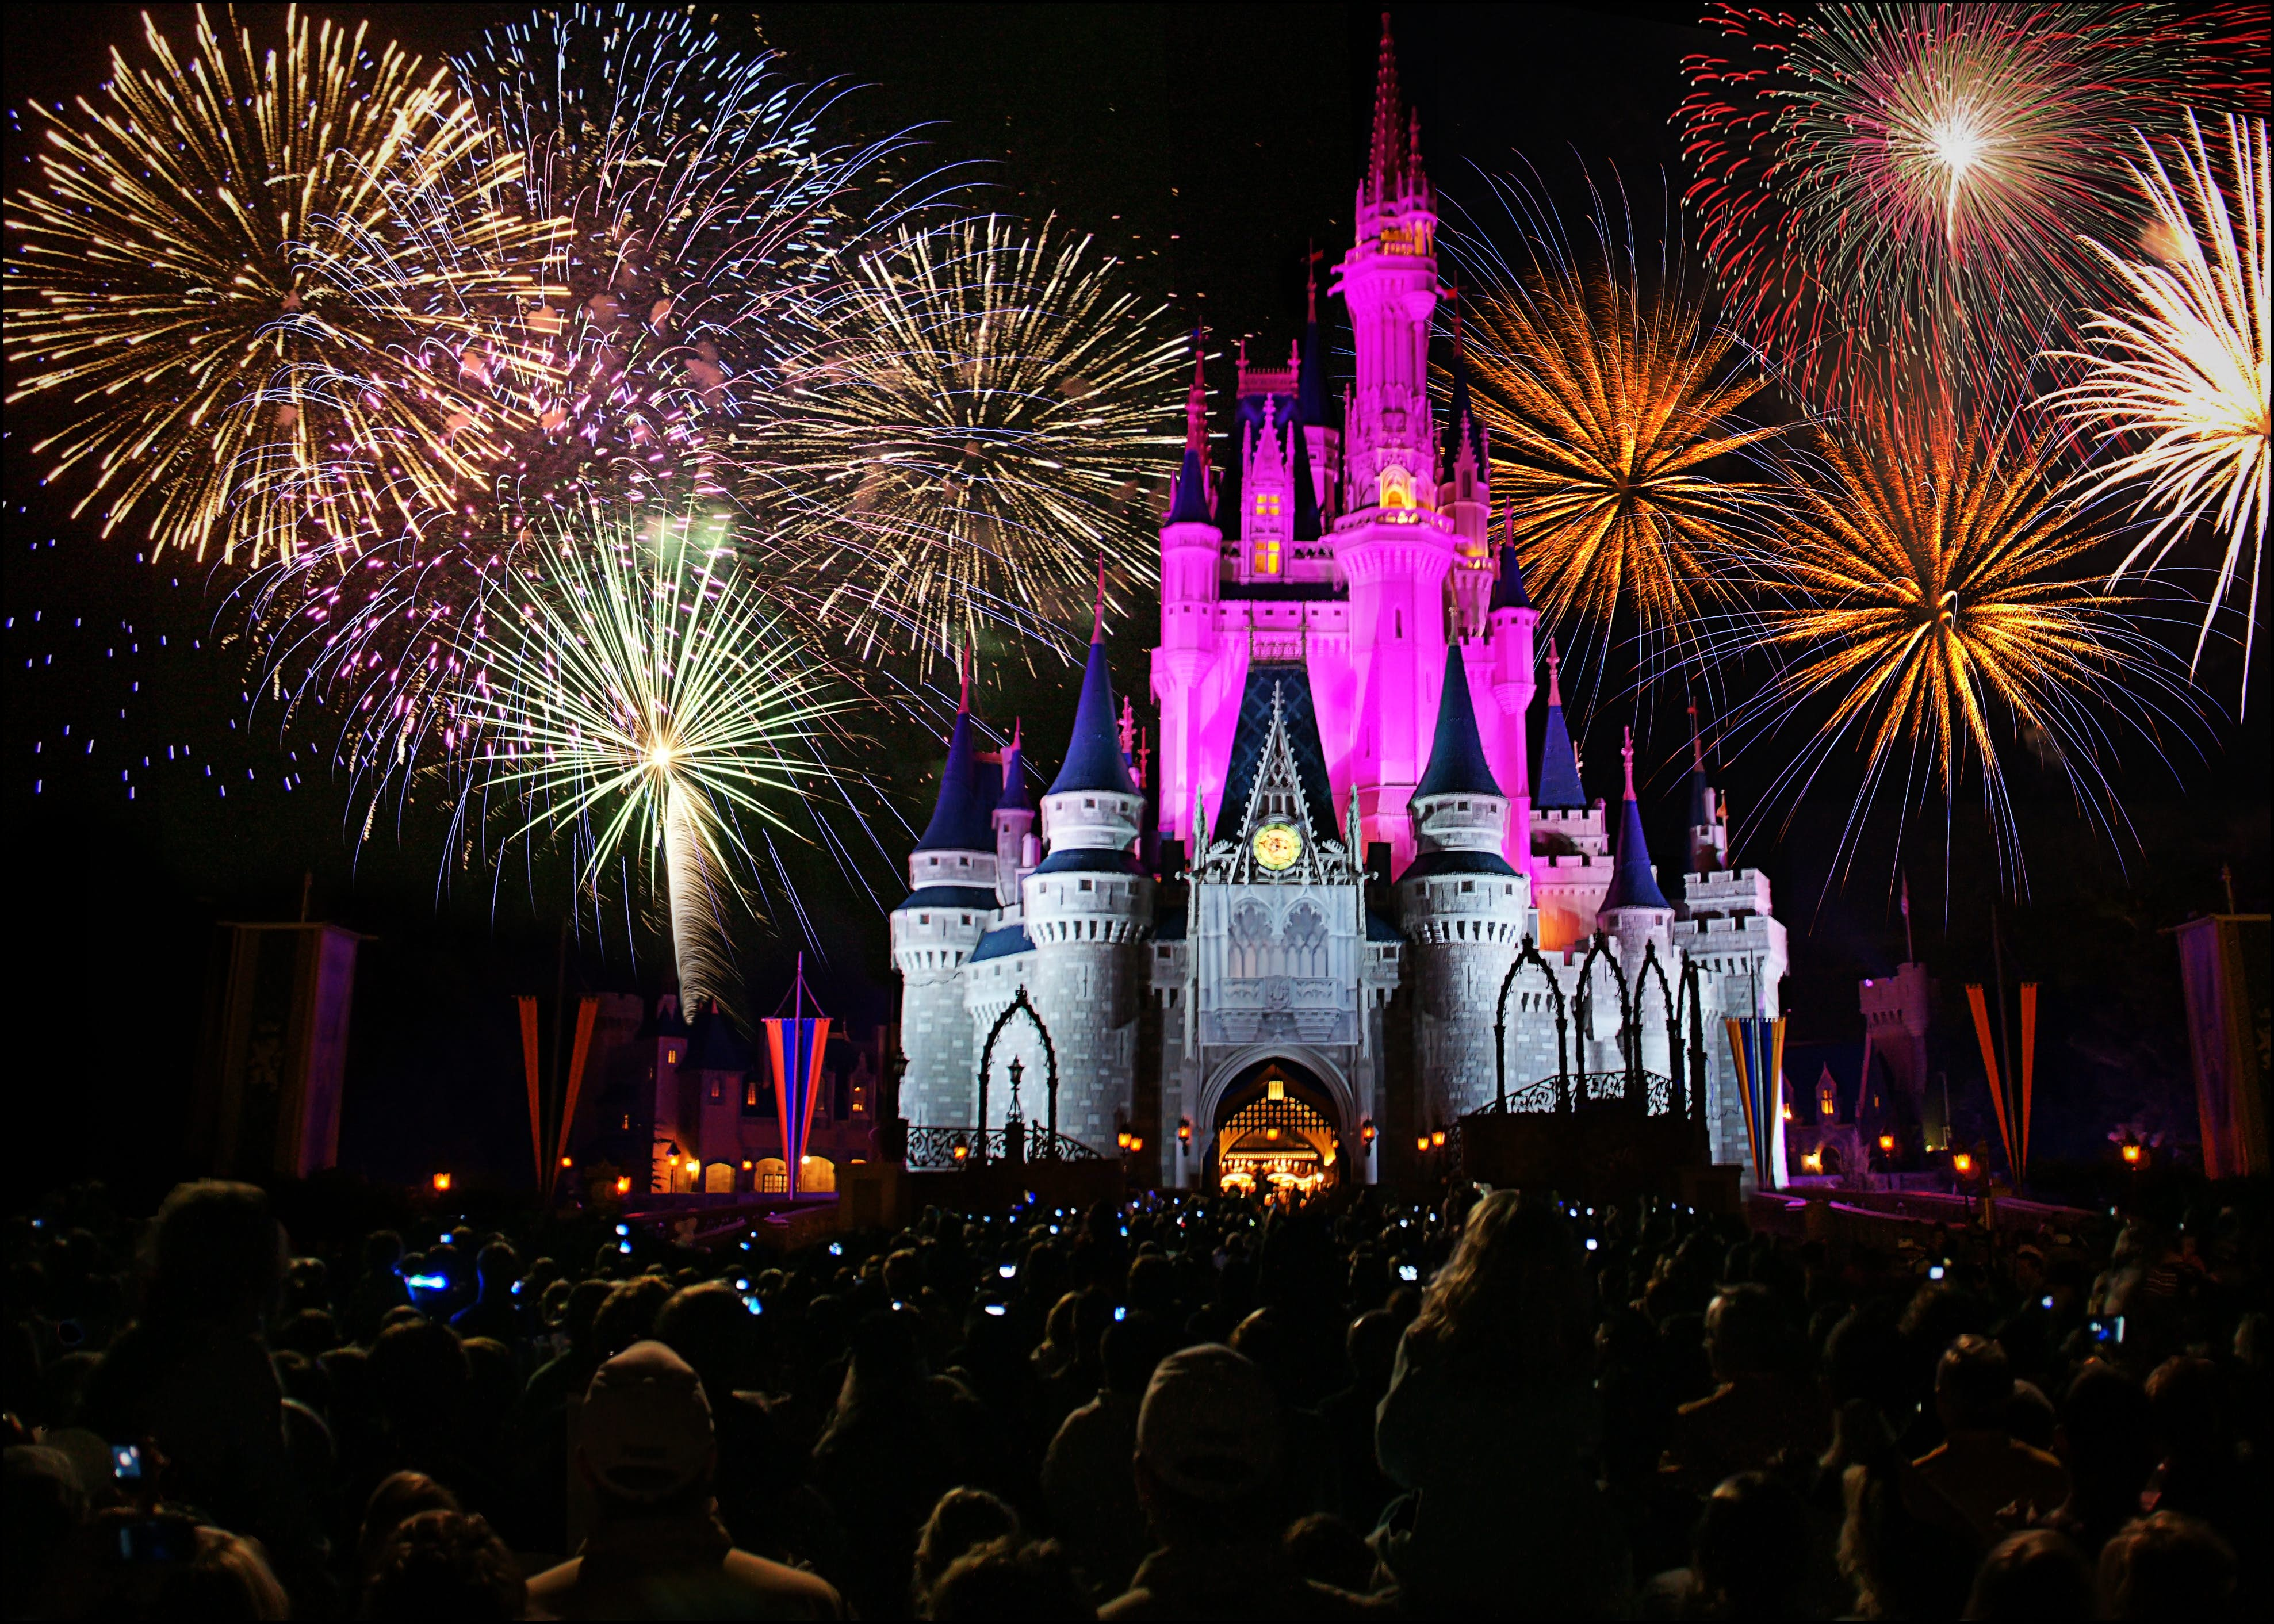

### You may be thinking " Whoa, what happened in 2015 around may to almost the end of the year?" and the answer is the Pirates of the Carribbean ride was actually shut down during that period explaining our gap in data.

##### Source: https://www.orlandoweekly.com/Blogs/archives/2015/03/03/walt-disney-worlds-pirates-of-the-caribbean-ride-to-close-may-11-through-sept-25-2015#:~:text=Bloggytown-,Walt%20Disney%20World's%20Pirates%20of%20the%20Caribbean%20ride%20to%20close,25%2C%202015

## In Conclusion The actual wait time was USUALLY less than the posted wait times across these three rides in magic kindom. 

## That being said this appears to vary greatly on the popularity of the ride as Pirates of the Carribbean seams to have many days throughout each year that has a drastic spike in its popularity whereas Splash Mountain and The 7 Dwarves Mine Train seems to have a relatively predicatable demand. 